In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
wine = pd.read_csv('winequality-red.csv')

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
wine.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


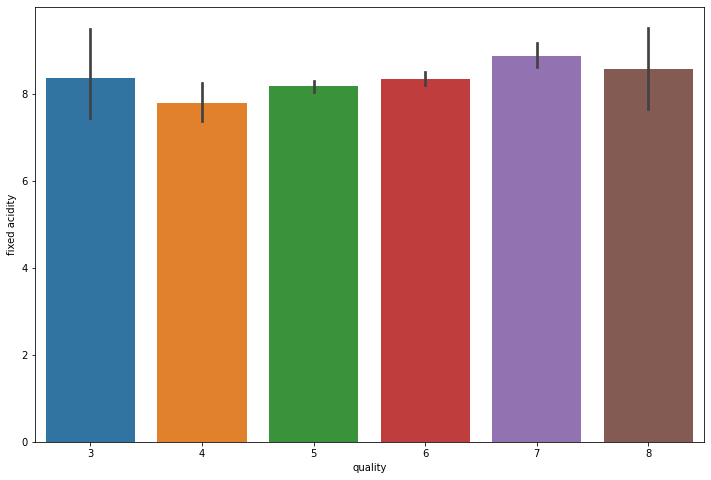

In [17]:
# data visulization to check how data columns are distributed 
# fixed acidity and quality 

fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'quality', y = 'fixed acidity',  data = wine)

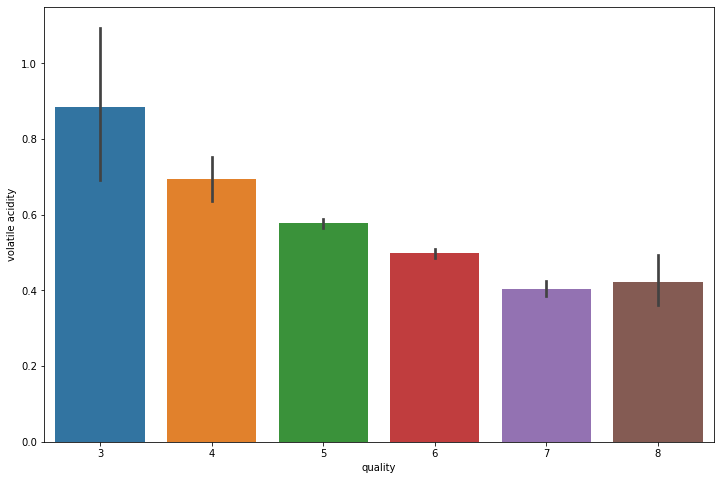

In [18]:
# volatile acidity and quality 

fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

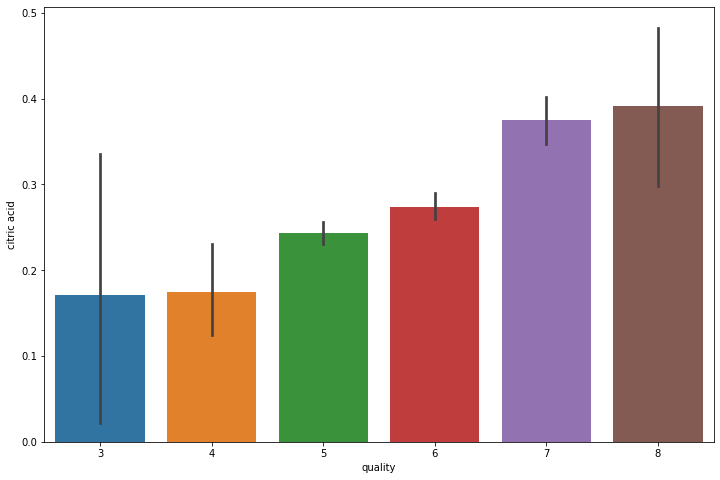

In [19]:
# critic acid and quality 

fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

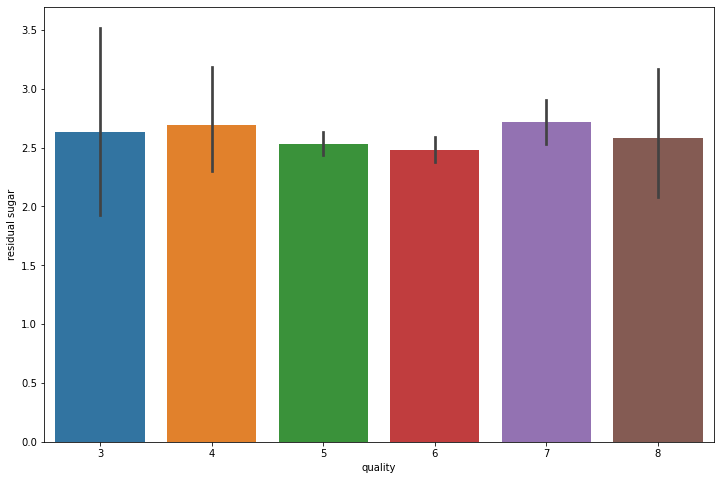

In [21]:
# residual sugar and quality 

fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

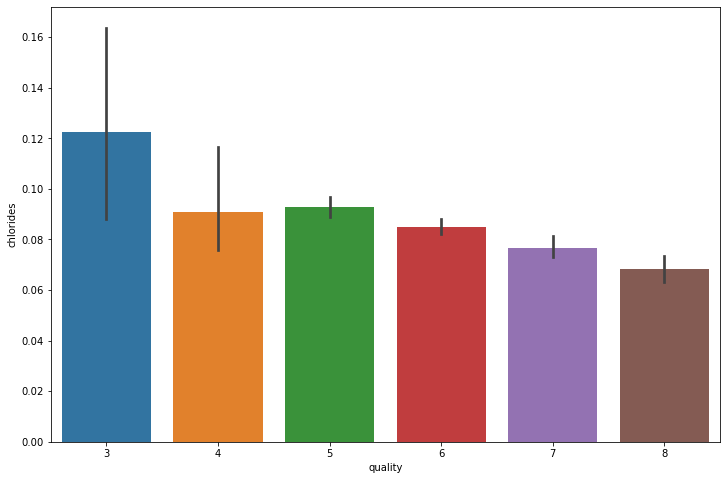

In [22]:
# chloride and quality 

fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

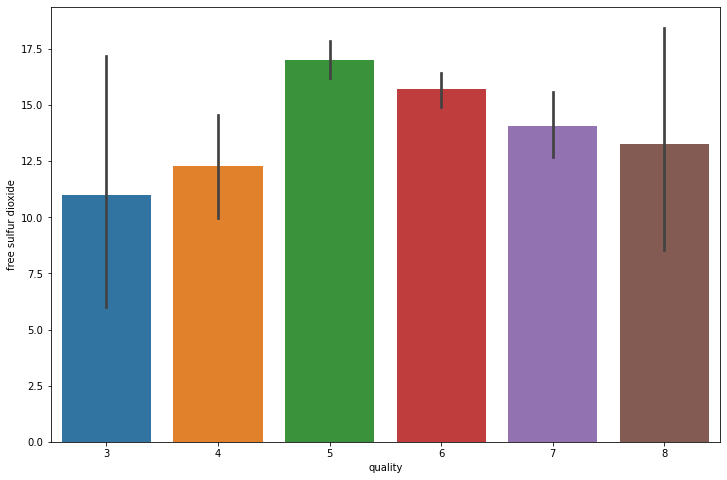

In [23]:
# sulphar di oxide 

ig = plt.figure(figsize = (12,8))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

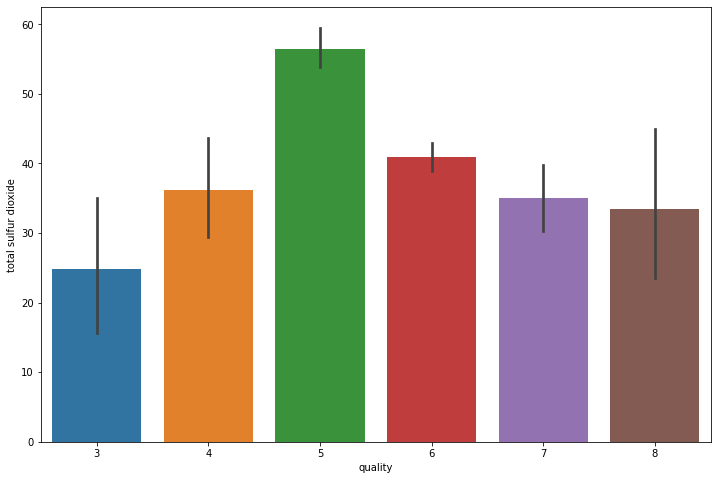

In [25]:
# total sulfar dioxide 

fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

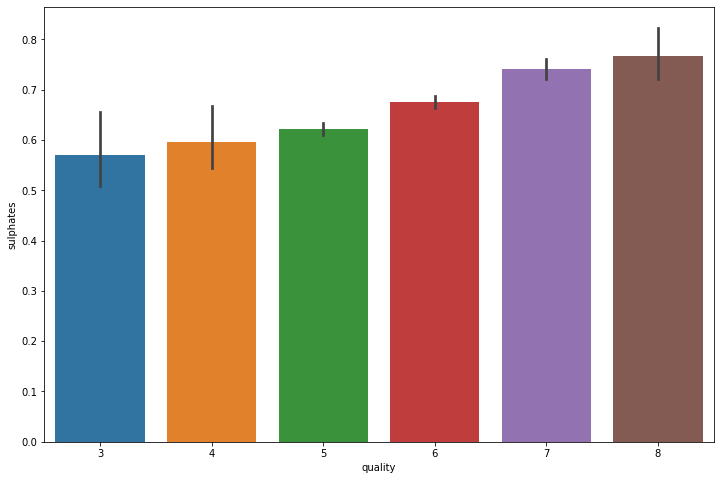

In [26]:
# sulphate 

fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

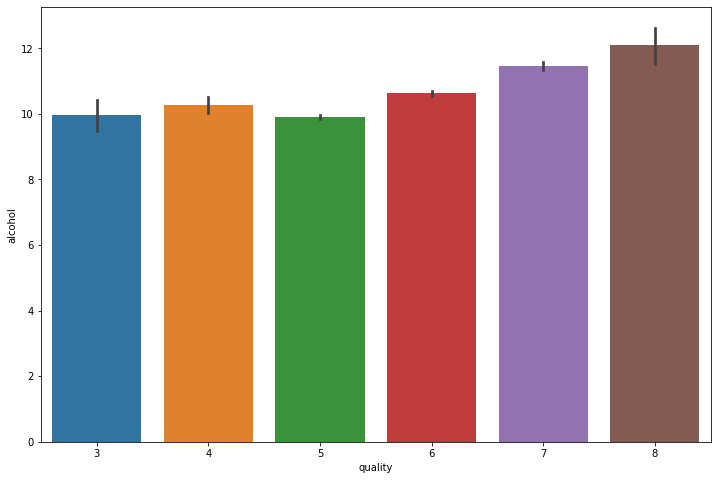

In [27]:
# alcohol

fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [48]:
# Data preprocessing and sklearn imports 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [30]:
# Binary classification 

bins = (2,6,8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [31]:
# assign label to quality variable 
label_quality = LabelEncoder()

In [32]:
# 0 is bad and 1 is good 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [33]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

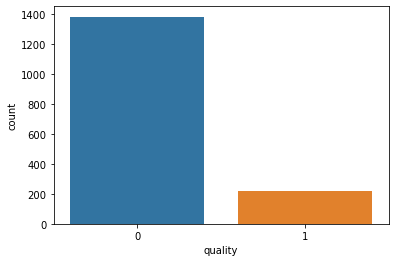

In [34]:
sns.countplot(wine['quality'])

In [35]:
# response and feature vvariable 

X = wine.drop('quality', axis = 1)
y = wine['quality']

In [36]:
# split the dataset 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [37]:
# standardscalar 
sc = StandardScaler()

In [38]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [39]:
# Random forest classifier 

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [40]:
# classification report 

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       285
           1       0.61      0.54      0.58        35

    accuracy                           0.91       320
   macro avg       0.78      0.75      0.76       320
weighted avg       0.91      0.91      0.91       320



In [41]:
# confusion matrix 

print(confusion_matrix(y_test, pred_rfc))

[[273  12]
 [ 16  19]]


In [42]:
# SVM 

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [43]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       285
           1       0.55      0.31      0.40        35

    accuracy                           0.90       320
   macro avg       0.74      0.64      0.67       320
weighted avg       0.88      0.90      0.88       320



In [44]:
# grid search CV 

#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [45]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [46]:
# run svc for best  params 

svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       285
           1       0.79      0.54      0.64        35

    accuracy                           0.93       320
   macro avg       0.87      0.76      0.80       320
weighted avg       0.93      0.93      0.93       320



In [47]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9030573326771654